In [2]:
 # 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install bs4
!pip install requests
!pip install matplotlib pyinputplus
!pip install requests matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.8/459.8 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.8/454.8 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 83.9 MB/s eta 0:00:00
  Attempting uninstall: fastcore
    Found existing in


🌦️  WELCOME TO MY WEATHER ASSISTANT 🌦️
📍 Enter city name: Miami
Choose temperature units:
1. Metric (°C, m/s)
2. Imperial (°F, mph)
3. Standard (K, m/s)
2

📋 MAIN MENU
--------------------
Please select one of the following:
1. 📊 Current Weather
2. 📈 5-Day Forecast Chart
3. 💬 Ask a Question
4. 🏙️ Change City
5. ⚙️ Change Units
6. ❌ Exit
2


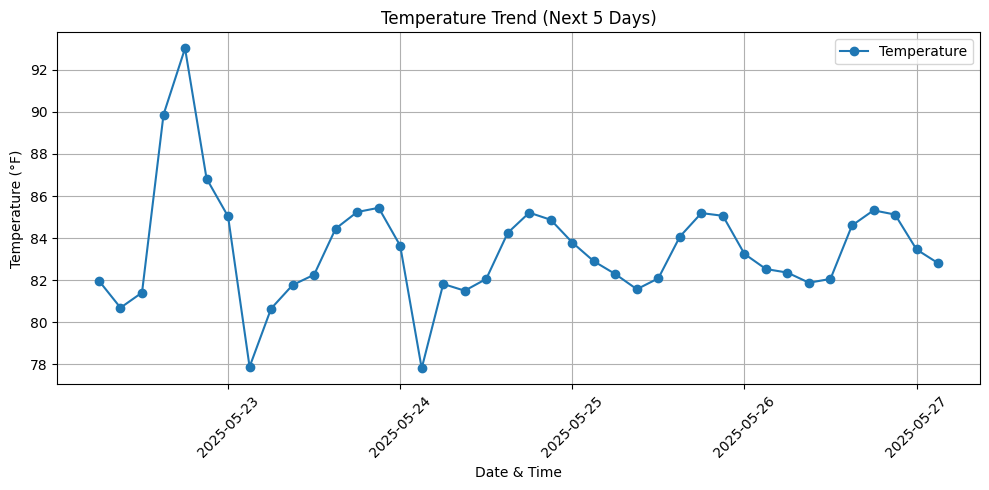

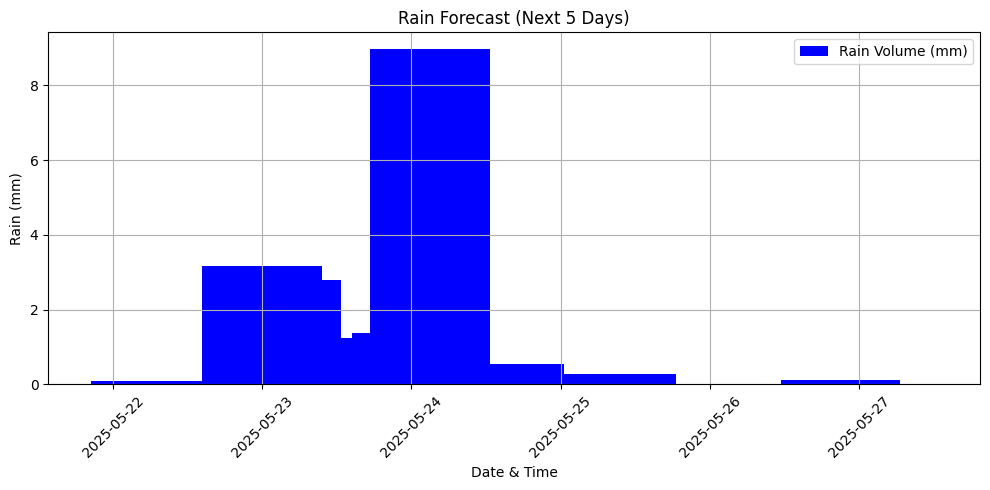

In [3]:
import requests
import pyinputplus as pyip
import matplotlib.pyplot as plt
import logging
from datetime import datetime
import sys
import os

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load API key - Directly use the API key string
API_KEY = '148e8cfafb2e24494693f49edb7e2296'

# Check if the API key is empty
if not API_KEY:
    print("API key is empty. Please provide a valid API key.")
    sys.exit(1)
# Defining the source for data retrieval
BASE_URL_CURRENT = "https://api.openweathermap.org/data/2.5/weather"
BASE_URL_FORECAST = "https://api.openweathermap.org/data/2.5/forecast"

def get_weather(city, units="metric"):
  # Fetching current weather data for a given city
    params = {"q": city, "appid": API_KEY, "units": units}
    try:
        response = requests.get(BASE_URL_CURRENT, params=params, timeout=10)
        response.raise_for_status()
        data = response.json()
        if data.get("cod") != 200: # Note: API returns 200 for success, not a string "200"
            print(f"Error: {data.get('message', 'Unknown error')}")
            return None
        return data
    except requests.exceptions.RequestException as e:
        logging.error(f"Weather request failed: {e}")
        return None

def get_forecast(city, units="metric"):
# Fetching weather forecast for the nextfive days given city
    params = {"q": city, "appid": API_KEY, "units": units}
    try:
        response = requests.get(BASE_URL_FORECAST, params=params, timeout=10)
        response.raise_for_status()
        data = response.json()
        if data.get("cod") != "200":
# Data handling to manage errors
            print(f"Error: {data.get('message', 'Unknown error')}")
            return None
        return data
    except requests.exceptions.RequestException as e:
        logging.error(f"Forecast request failed: {e}")
        return None

def display_current_weather(data, units="metric"):
# Current weather data conditions
    if not data:
        print("No data to display.")
        return
    name = data.get('name')
    country = data['sys'].get('country', 'N/A')
    temp = data['main'].get('temp', 'N/A')
    condition = data['weather'][0].get('description', 'N/A').title()
    temp_unit = '°C' if units == 'metric' else '°F' if units == 'imperial' else 'K'
    print(f"\n📍 {name}, {country}")
    print(f"🌡️  Temperature: {temp}{temp_unit}")
    print(f"🌤️  Conditions: {condition}")
    print(f"💧 Humidity: {data['main'].get('humidity')}%")
    print(f"💨 Wind: {data['wind'].get('speed')} m/s")

def plot_temperature_trend(forecast_data, units="metric"):
    dates = []
    temps = []
 # Add check for 'list' key
    if 'list' not in forecast_data or not forecast_data['list']:
        print("No forecast entries found for plotting temperature.")
        return
 # For loop data retrieval from a dictionary
    for entry in forecast_data['list']:
        dates.append(datetime.fromtimestamp(entry['dt']))
        temps.append(entry['main']['temp'])

    plt.figure(figsize=(10, 5))
    plt.plot(dates, temps, label='Temperature', marker='o')
    plt.title("Temperature Trend (Next 5 Days)")
    plt.xlabel("Date & Time")
    plt.ylabel(f"Temperature ({'°C' if units == 'metric' else '°F'})")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

def plot_precipitation_chance(forecast_data):
# Displays precipitation chances for the next five days.
    dates = []
    rain = []
# Add check for 'list' key
    if 'list' not in forecast_data or not forecast_data['list']:
        print("No forecast entries found for plotting precipitation.")
        return
    for entry in forecast_data['list']:
        dates.append(datetime.fromtimestamp(entry['dt']))
        rain.append(entry.get('rain', {}).get('3h', 0))

    plt.figure(figsize=(10, 5))
    plt.bar(dates, rain, label='Rain Volume (mm)', color='blue')
    plt.title("Rain Forecast (Next 5 Days)")
    plt.xlabel("Date & Time")
    plt.ylabel("Rain (mm)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()
# Field Parsing natural  language queries and providing weather-related questions
def parse_natural_language_query(query, city, units="metric"):
    query = query.lower()
    if "temperature" in query or "hot" in query:
        weather = get_weather(city, units)
        if weather:
            print(f"It is currently {weather['main']['temp']}° with {weather['weather'][0]['description']}.")
    elif "rain" in query or "precipitation" in query:
        forecast = get_forecast(city, units)
        if forecast:
            print("🌧️ Rain forecast (next 24h):")
 # Add check for 'list' key before slicing
            if 'list' in forecast:
                for entry in forecast['list'][:8]:
                    rain = entry.get('rain', {}).get('3h', 0)
                    time = datetime.fromtimestamp(entry['dt']).strftime("%a %H:%M")
                    print(f"⏰ {time}: 🌧️ {rain} mm")
            else:
                print("No forecast data available.")
    else:
        print("I didn't understand your question. Try asking about temperature or rain.")

def choose_units():
    unit_choice = pyip.inputMenu(["Metric (°C, m/s)", "Imperial (°F, mph)", "Standard (K, m/s)"],
                                 prompt="Choose temperature units:\n", numbered=True)
    return {"Metric (°C, m/s)": "metric", "Imperial (°F, mph)": "imperial", "Standard (K, m/s)": "standard"}[unit_choice]

# Display the main weather menu and handle user input.
def main_menu():

    print("\n" + "="*40)
    print("🌦️  WELCOME TO MY WEATHER ASSISTANT 🌦️")
    print("="*40)
    city = pyip.inputStr(prompt="📍 Enter city name: ")
    units = choose_units()

    while True:
        print("\n📋 MAIN MENU")
        print("-" * 20)
        choice = pyip.inputMenu(
            ["📊 Current Weather", "📈 5-Day Forecast Chart", "💬 Ask a Question",
             "🏙️ Change City", "⚙️ Change Units", "❌ Exit"],
            numbered=True
        )
# Assessing weather conditions and forecasting.
        if choice.startswith("📊"):
            data = get_weather(city, units)
            display_current_weather(data, units)
        elif choice.startswith("📈"):
            forecast_data = get_forecast(city, units)
            if forecast_data:
                plot_temperature_trend(forecast_data, units)
                plot_precipitation_chance(forecast_data)
        elif choice.startswith("💬"):
            query = pyip.inputStr(prompt="🧠 Ask your weather question: ")
            parse_natural_language_query(query, city, units)
        elif choice.startswith("🏙️"):
            city = pyip.inputStr(prompt="🌍 Enter new city: ")
        elif choice.startswith("⚙️"):
            units = choose_units()
        elif choice.startswith("❌"):
            print("\n👋 Thanks for using the Weather Assistant. Stay safe!")
# Closing the For loop
        break

if __name__ == "__main__":
    main_menu()